# A2Q1

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## (b)

In [2]:
def Dynamics(t, y):
    """ Implements the ODE y'(t) """
    return (y / 20) * (10 - y)

def ExactVal(t):
    """ Returns the exact solution y(t) """
    return 10 / (49 * np.exp(-t / 2) + 1)

## (c)

In [3]:
def ForwardEuler(t0, tfinal, N, y0):
    """ Implements the Forward Euler method """
    h = (tfinal - t0) / N  # Step size
    t_values = np.linspace(t0, tfinal, N + 1)  # Time points
    y_values = np.zeros(N + 1)  # Solution values
    y_values[0] = y0  # Initial condition

    for i in range(N):
        y_values[i + 1] = y_values[i] + h * Dynamics(t_values[i], y_values[i])

    return t_values, y_values  # Return time and solution arrays

## (d)

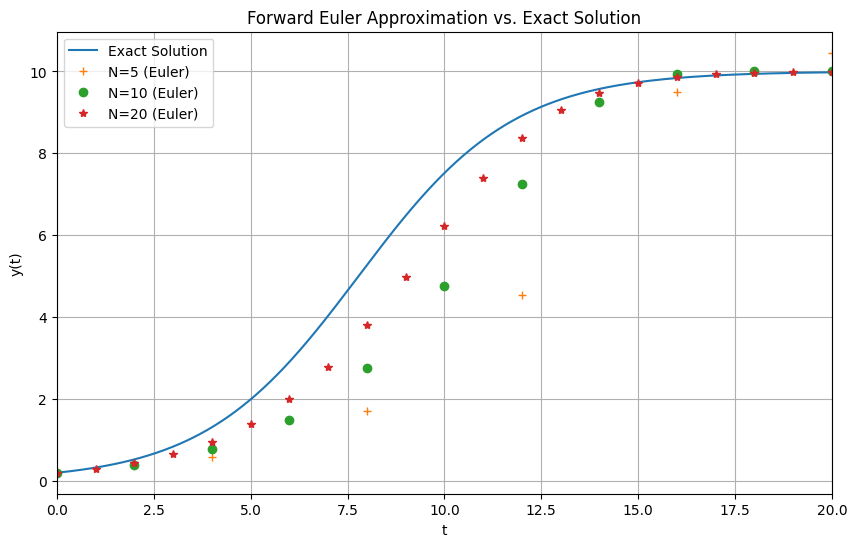

In [4]:
# Define parameters
t0, tfinal = 0, 20
y0 = 1/5

# Compute solutions with different step sizes
t_5, y_5 = ForwardEuler(t0, tfinal, 5, y0)
t_10, y_10 = ForwardEuler(t0, tfinal, 10, y0)
t_20, y_20 = ForwardEuler(t0, tfinal, 20, y0)

# Compute exact solution at the same times as N3 solution
t_exact = np.linspace(t0, tfinal, 1000)
y_exact = ExactVal(t_exact)

# Plot results
plt.figure(figsize=(10, 6))
plt.plot(t_exact, y_exact, label="Exact Solution")
plt.plot(t_5, y_5, '+', label="N=5 (Euler)")
plt.plot(t_10, y_10, 'o', label="N=10 (Euler)")
plt.plot(t_20, y_20, '*', label="N=20 (Euler)")

plt.xlim(0, 20)
plt.xlabel("t")
plt.ylabel("y(t)")
plt.legend()
plt.title("Forward Euler Approximation vs. Exact Solution")
plt.grid()
plt.show()

## (e)

In [5]:
def ExplicitMidpoint(t0, tfinal, N, y0):
    """ Implements the Explicit Midpoint Method """
    h = (tfinal - t0) / N  # Step size
    t_values = np.linspace(t0, tfinal, N + 1)  # Time points
    y_values = np.zeros(N + 1)  # Solution values
    y_values[0] = y0  # Initial condition

    for i in range(N):
        k1 = Dynamics(t_values[i], y_values[i])
        k2 = Dynamics(t_values[i] + h/2, y_values[i] + (h/2) * k1)
        y_values[i + 1] = y_values[i] + h * k2

    return t_values, y_values  # Return time and solution arrays

## (f)

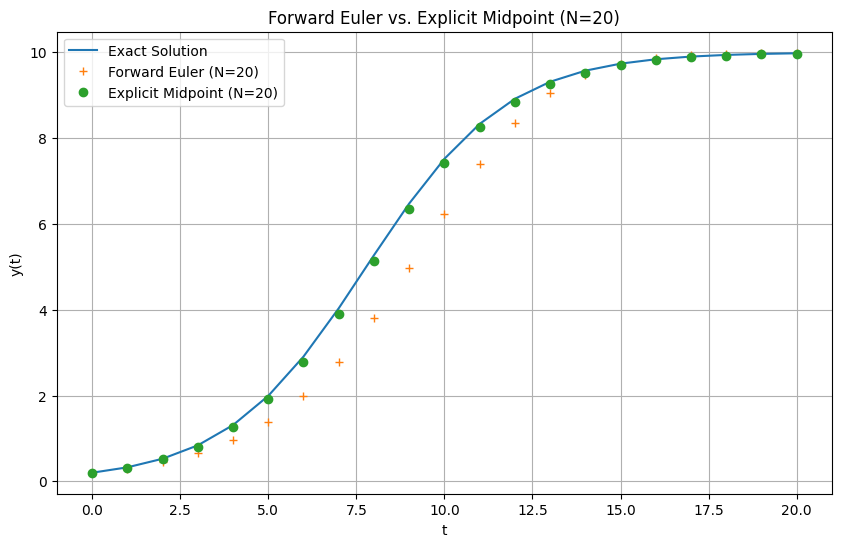

In [6]:
# Compute solutions for N = 20
t_20_FE, y_20_FE = ForwardEuler(t0, tfinal, 20, y0)
t_20_EM, y_20_EM = ExplicitMidpoint(t0, tfinal, 20, y0)

# Compute exact solution at same times
y_exact_20 = ExactVal(t_20_FE)

# Plot results
plt.figure(figsize=(10, 6))
plt.plot(t_20_FE, y_exact_20, label="Exact Solution")  # Solid line for exact
plt.plot(t_20_FE, y_20_FE, '+', label="Forward Euler (N=20)")
plt.plot(t_20_EM, y_20_EM, 'o', label="Explicit Midpoint (N=20)")

plt.xlabel("t")
plt.ylabel("y(t)")
plt.legend()
plt.title("Forward Euler vs. Explicit Midpoint (N=20)")
plt.grid()
plt.show()